<a href="https://colab.research.google.com/github/DrKamaleshR/Supervised-ML-regression/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

For any business growth it is very important to know it's future business and take steps accordingly to improve or grow their business.

Here we have Rossmann various stores and we are to predict sales for different stores.

Let's start by exploring data set, which are the factors affecting Sales in this stores.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [3]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from catboost import CatBoostRegressor

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
ross_dfpath='/content/drive/My Drive/almabetter projects/SUPERVISED re/Rossmann Stores Data.csv'

In [7]:
rosstorepath='/content/drive/My Drive/almabetter projects/SUPERVISED re/store.csv'

In [8]:
ross_df=pd.read_csv(ross_dfpath)

In [9]:
store_df=pd.read_csv(rosstorepath)


# Exploratory Data Analysis



In [10]:
ross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
ross_df.shape

(1017209, 9)

In [12]:
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [13]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [14]:
store_df.shape

(1115, 10)

In [15]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [16]:
'''CHECKING FOR NaN values'''
ross_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

No NaN caluses are present in ross_df.csv

In [17]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Numerous Nan values are seen in - 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'. However, 'CompetitionDistance 'has only 3 null values. Data cleaning is needed.


In [18]:
#creating copy
store_dfv2 = store_df.copy()

In [19]:
## Replacing Nan values with 0.
store_dfv2['CompetitionOpenSinceMonth'] = store_dfv2['CompetitionOpenSinceMonth'].fillna(0)
store_dfv2['CompetitionOpenSinceYear'] = store_dfv2['CompetitionOpenSinceYear'].fillna(0)
store_dfv2['Promo2SinceWeek'] = store_dfv2['Promo2SinceWeek'].fillna(0)
store_dfv2['Promo2SinceYear'] = store_dfv2['Promo2SinceYear'].fillna(0)
store_dfv2['PromoInterval'] = store_dfv2['PromoInterval'].fillna(0)

In [20]:
## code for replacing Nan values in CompetitionDistance with mode.
store_dfv2['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [21]:
store_dfv2.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [22]:
ROSS = pd.merge(ross_df, store_dfv2, on='Store', how='left')
ROSS.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [23]:
ROSS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [24]:
#lets find out data range of the data
print(ROSS['Date'].min(),'- start')
print(ROSS['Date'].max(), '- end')

2013-01-01 - start
2015-07-31 - end


We have have  2 years 7 months data values recorded, about 31 months retail sales data in the datasheet.

In [25]:
ROSS.head(1115)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,5,2015-07-31,5723,422,1,1,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,5,2015-07-31,9626,767,1,1,0,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,5,2015-07-31,7289,720,1,1,0,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,5,2015-07-31,27508,3745,1,1,0,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [26]:
ROSS.tail(1114)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1016095,1,2,2013-01-01,0,0,0,0,a,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1016096,2,2,2013-01-01,0,0,0,0,a,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1016097,3,2,2013-01-01,0,0,0,0,a,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1016098,4,2,2013-01-01,0,0,0,0,a,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
1016099,5,2,2013-01-01,0,0,0,0,a,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


Store_df2 and Ross_df is successfully merged.

Sales is key variable, lets check if it has negative values or 0.

In [27]:
ROSS[ROSS['Sales'] <= 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
291,292,5,2015-07-31,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
875,876,5,2015-07-31,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov"
1406,292,4,2015-07-30,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
1990,876,4,2015-07-30,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov"
2521,292,3,2015-07-29,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [28]:
# Checking if false sale values are present in closed stores
ROSS[(ROSS['Open'] == 1) & (ROSS['Sales'] == 0)]


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
86825,971,5,2015-05-15,0,0,1,0,0,1,c,a,1140.0,5.0,2011.0,1,14.0,2012.0,"Mar,Jun,Sept,Dec"
142278,674,4,2015-03-26,0,0,1,0,0,0,a,a,2640.0,12.0,2005.0,1,31.0,2013.0,"Feb,May,Aug,Nov"
196938,699,4,2015-02-05,0,0,1,1,0,0,a,a,180.0,0.0,0.0,1,5.0,2013.0,"Jan,Apr,Jul,Oct"
322053,708,3,2014-10-01,0,0,1,1,0,0,c,c,11470.0,10.0,2009.0,1,18.0,2014.0,"Jan,Apr,Jul,Oct"
330176,357,1,2014-09-22,0,0,1,0,0,0,a,a,2060.0,10.0,2008.0,0,0.0,0.0,0
340348,227,4,2014-09-11,0,0,1,0,0,0,a,a,2370.0,0.0,0.0,0,0.0,0.0,0
340860,835,4,2014-09-11,0,0,1,0,0,0,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
341795,835,3,2014-09-10,0,0,1,0,0,0,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
346232,548,5,2014-09-05,0,0,1,1,0,1,d,c,3760.0,2.0,2009.0,0,0.0,0.0,0
346734,28,4,2014-09-04,0,0,1,1,0,0,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec"


We can see that all closed stores have 0 sales values.


In [29]:
ROSS['Date']=pd.to_datetime(ROSS['Date'])

In [30]:
ROSS['Date'].dtypes
ROSS['year']=ROSS['Date'].dt.year
ROSS['month']=ROSS['Date'].dt.month
ROSS['week']=ROSS['Date'].dt.week

In [31]:
# Lets remove the number of closed stores, as they serves minimal to no purpose. Lets also drop the column'open'
ROSS2=ROSS[(ROSS['Open']==1)]
ROSS2.drop(['Open'],axis = 1, inplace=True)

In [32]:
ROSS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Promo                      844392 non-null  int64         
 6   StateHoliday               844392 non-null  object        
 7   SchoolHoliday              844392 non-null  int64         
 8   StoreType                  844392 non-null  object        
 9   Assortment                 844392 non-null  object        
 10  CompetitionDistance        844392 non-null  float64       
 11  CompetitionOpenSinceMonth  844392 non-null  float64

In [33]:
ROSS2.shape

(844392, 20)

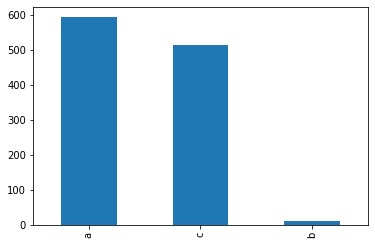

In [34]:
#categorical data visualisation
store_df['Assortment'].value_counts().plot(kind='bar')

Assortment type 'a' has higher counts, followed by 'c'.

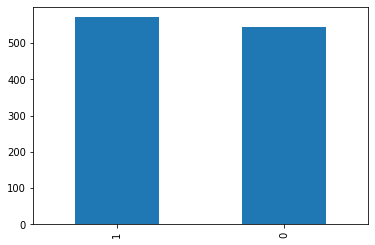

In [35]:
store_df['Promo2'].value_counts().plot(kind='bar')

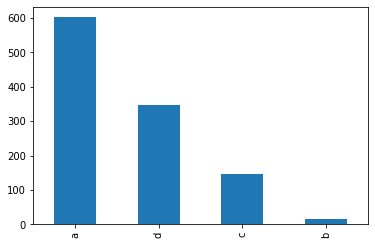

In [36]:

store_df['StoreType'].value_counts().plot(kind='bar')

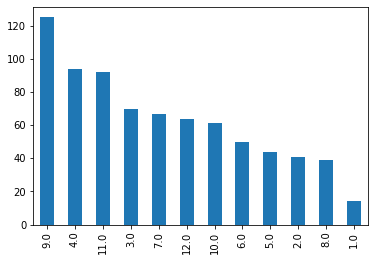

In [37]:
store_df['CompetitionOpenSinceMonth'].value_counts().plot(kind='bar')

We can see most competions are open in the month of September followed by April and November.

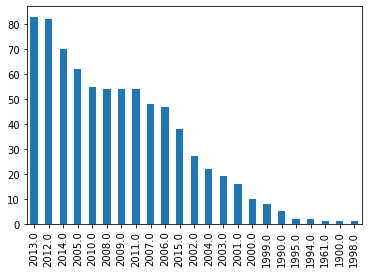

In [38]:
store_df['CompetitionOpenSinceYear'].value_counts().plot(kind='bar')

We can see that after 2012 the number of competitors have increased drastically.

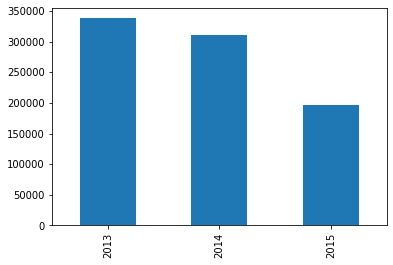

In [39]:
ROSS2['year'].value_counts().plot(kind='bar')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f84fd5777d0>,)

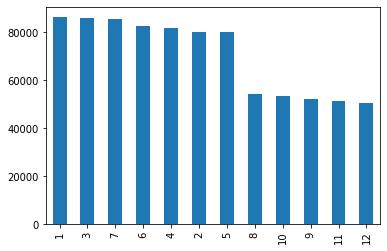

In [40]:
ROSS2['month'].value_counts().plot(kind='bar'),

**Continous** **Data** **Visualisation**

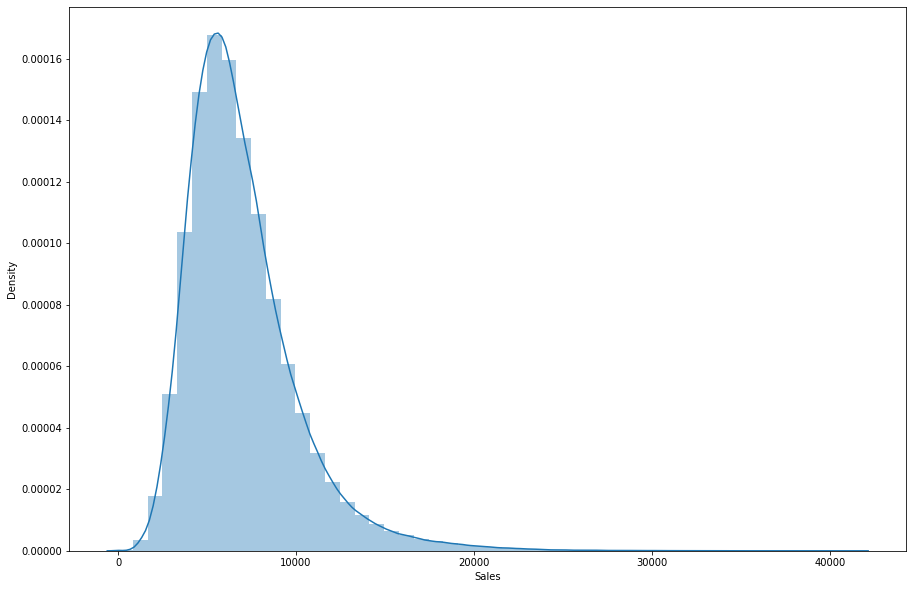

In [41]:
#Sales
plt.figure(figsize=(15,10))
sns.distplot(ROSS2['Sales'])

Sales distribution which is the target or dependent variable  seems to be positively skewed. Positively skewed can be explained as distribution more piled towards the left and median usually lesser than mean. 

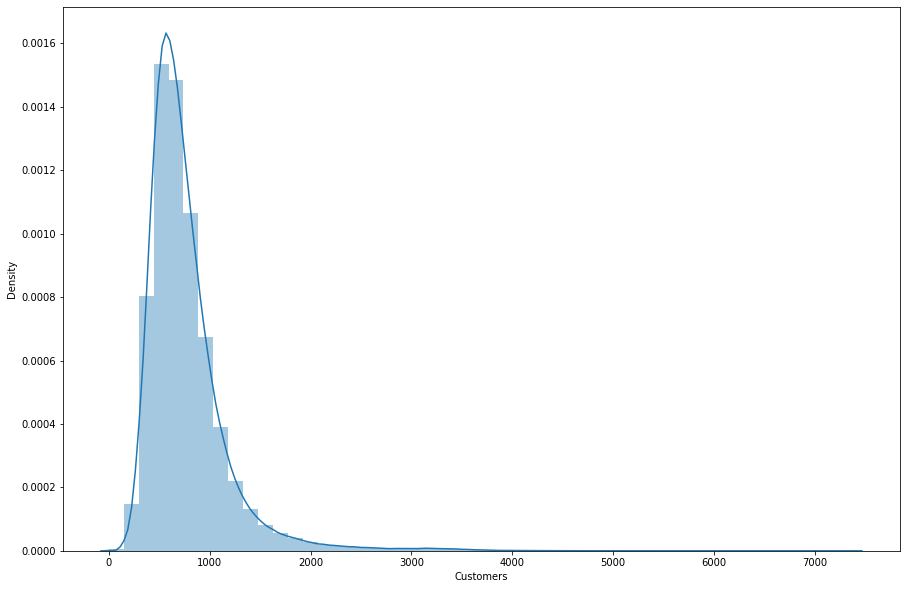

In [42]:
#Customers
plt.figure(figsize=(15,10))
sns.distplot(ROSS2['Customers'])

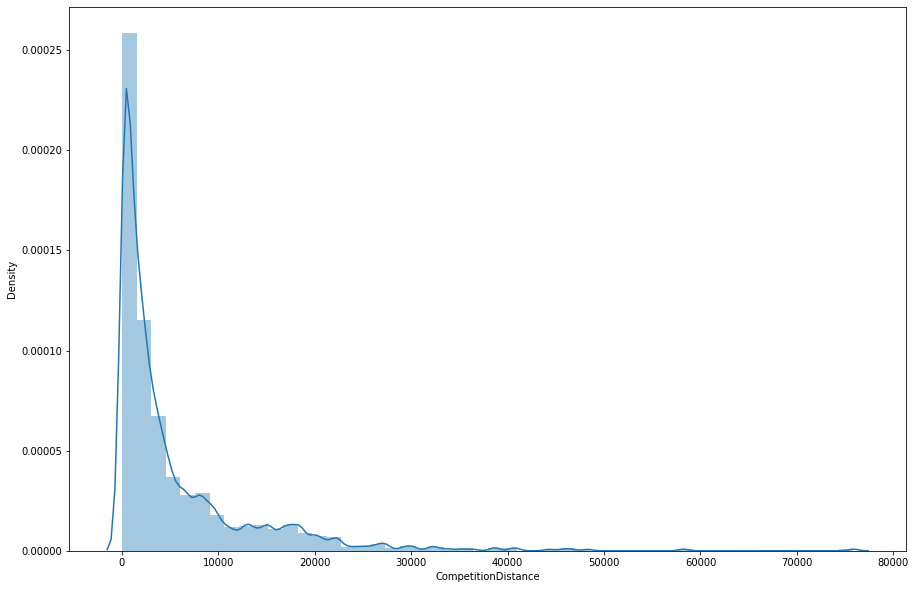

In [43]:
#CompetitionDistance
plt.figure(figsize=(15,10))
sns.distplot(ROSS2['CompetitionDistance'])

**Sales vs Other Features**

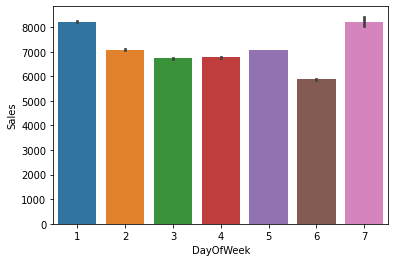

In [44]:
# Sales vs Other variable
#Sales vs Dayofweek
sns.barplot(x="DayOfWeek", y="Sales", data=ROSS2)
plt.show()

We can see that weekends have higher sale than weekdays.

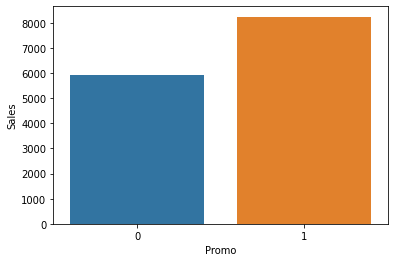

In [45]:
sns.barplot(x="Promo", y="Sales", data=ROSS2)
plt.show()

Sales is better with promotion.

In [46]:
ROSS2.loc[ROSS2['StateHoliday'] == '0', 'StateHoliday'] = 0
ROSS2.loc[ROSS2['StateHoliday'] == 'a', 'StateHoliday'] = 1
ROSS2.loc[ROSS2['StateHoliday'] == 'b', 'StateHoliday'] = 2
ROSS2.loc[ROSS2['StateHoliday'] == 'c', 'StateHoliday'] = 3
ROSS2['StateHoliday'] = ROSS2['StateHoliday'].astype(int, copy=False)

print('levels :', ROSS2['StateHoliday'].unique(), '; data type :', ROSS2['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int64


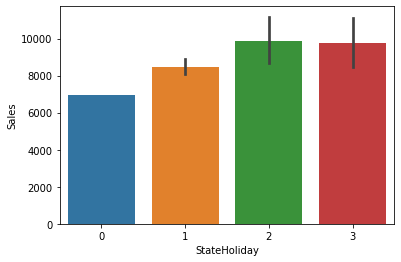

In [47]:
sns.barplot(x="StateHoliday", y="Sales", data=ROSS2)


:1 = public holiday, 2 = Easter holiday, 3 = Christmas, 0 = None.
Sales perform well on State holidays especially easter and christmas holidays.

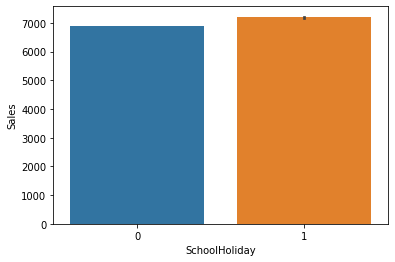

In [48]:
sns.barplot(x="SchoolHoliday", y="Sales", data=ROSS2)


sales perform better on school holidays.

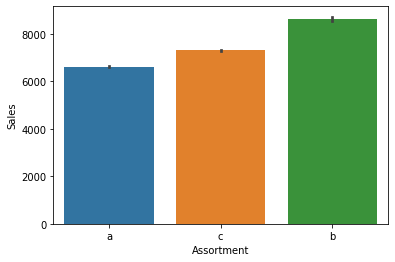

In [49]:
sns.barplot(x="Assortment", y="Sales", data=ROSS2)

Type b assortment performs better in terms of sales, followed by type c assortments.

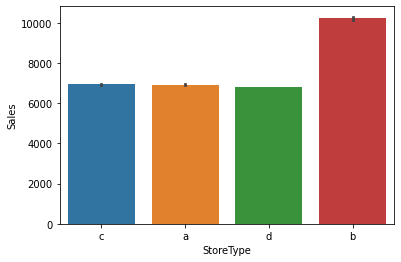

In [50]:
sns.barplot(x="StoreType", y="Sales", data=ROSS2)

In [51]:
print(ROSS2[ROSS2['StoreType'] == 'a']['Sales'].mean())
print(ROSS2[ROSS2['StoreType'] == 'b']['Sales'].mean())
print(ROSS2[ROSS2['StoreType'] == 'c']['Sales'].mean())
print(ROSS2[ROSS2['StoreType'] == 'd']['Sales'].mean())

6925.167661028667
10231.40750497976
6932.512754695605
6822.1418805598705


**Storetype B performs better** than all other store types.

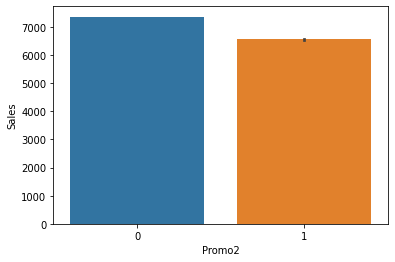

In [52]:
sns.barplot(x="Promo2", y="Sales", data=ROSS2)
plt.show()

Stores not participating in continous promotion perform better when compared to stores with contionous promotion.

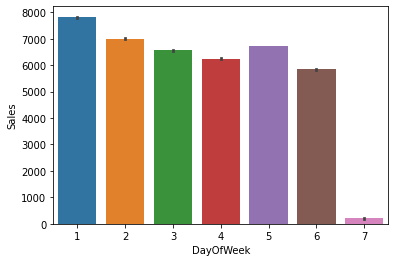

In [53]:
sns.barplot(x="DayOfWeek", y="Sales", data=ROSS)

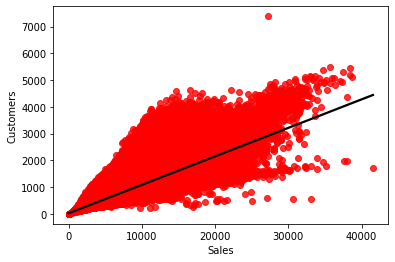

In [54]:
#Sales vs No of customers Correlation
sns.regplot(x=ROSS2['Sales'], y=ROSS2['Customers'],scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [55]:
ROSS2['Customers'].corr(ROSS2['Sales'])

0.8235967321975434

No of customers and amount of sales is highly correlated with R value of 0.82

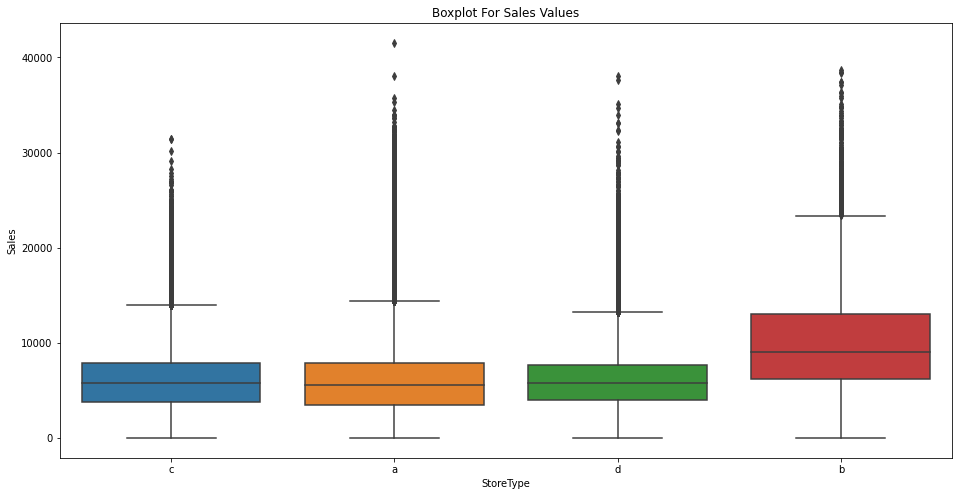

In [56]:
plt.figure(figsize=(16, 8))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=ROSS)
plt.title('Boxplot For Sales Values')
plt.show()

Outliers need to be handled.

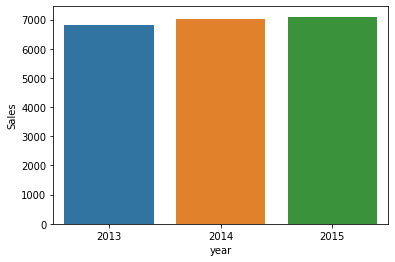

In [57]:
#Average sales each year
sns.barplot(x="year", y="Sales", data=ROSS2)

In [58]:
print(ROSS2[ROSS2['year'] == 2013]['Sales'].mean())
print(ROSS2[ROSS2['year'] == 2014]['Sales'].mean())
print(ROSS2[ROSS2['year'] == 2015]['Sales'].mean())

6814.3920246905545
7025.4042014451525
7088.126647690173


We can see avaerage sales is increasing each year.

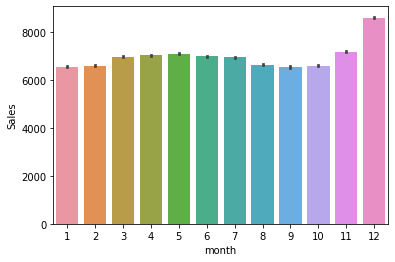

In [59]:
#Average sales based on month
sns.barplot(x="month", y="Sales", data=ROSS2)

November and December have the highest average sales.

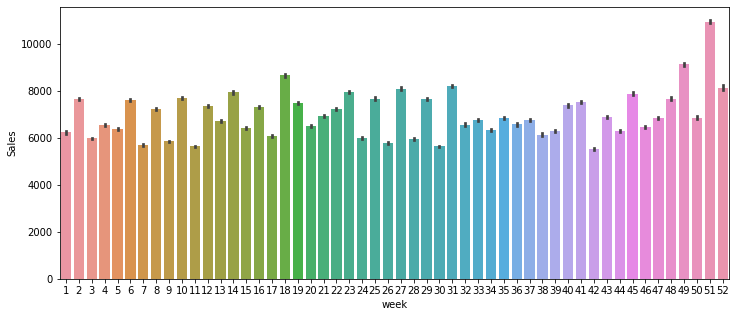

In [60]:
#Average sales based on week
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x="week", y="Sales", data=ROSS2,ax=ax)

We can clearly see the spike in sales during the christmas time i.e the 51st week.

FEATURE PREDICTION MODEL.


In [61]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score

In [62]:
# code for changing Assortment dtype from object to int.
ROSS2.loc[ROSS2['Assortment'] == 'a', 'Assortment'] = 1
ROSS2.loc[ROSS2['Assortment'] == 'b', 'Assortment'] = 2
ROSS2.loc[ROSS2['Assortment'] == 'c', 'Assortment'] = 3
ROSS2['Assortment'] = ROSS2['Assortment'].astype(int, copy=False)

print('levels :', ROSS2['Assortment'].unique(), '; data type :', ROSS2['Assortment'].dtype)

levels : [1 3 2] ; data type : int64


In [63]:
# code for changing StoreType dtype from object to int.
ROSS2.loc[ROSS2['StoreType'] == 'a', 'StoreType'] = 0
ROSS2.loc[ROSS2['StoreType'] == 'b', 'StoreType'] = 1
ROSS2.loc[ROSS2['StoreType'] == 'c', 'StoreType'] = 2
ROSS2.loc[ROSS2['StoreType'] == 'd', 'StoreType'] = 3
ROSS2['StoreType'] = ROSS2['StoreType'].astype(int, copy=False)

print('levels :', ROSS2['StoreType'].unique(), '; data type :', ROSS2['StoreType'].dtype)

levels : [2 0 3 1] ; data type : int64


In [64]:
ROSS2['CompetitionOpenSinceYear']= ROSS2['CompetitionOpenSinceYear'].astype(int)
ROSS2['Promo2SinceYear']= ROSS2['Promo2SinceYear'].astype(int)

In [65]:
ROSS2['Promo2SinceWeek']= ROSS2['Promo2SinceWeek'].astype(int)

Variable selection for prediction model.

(18.5, -0.5)

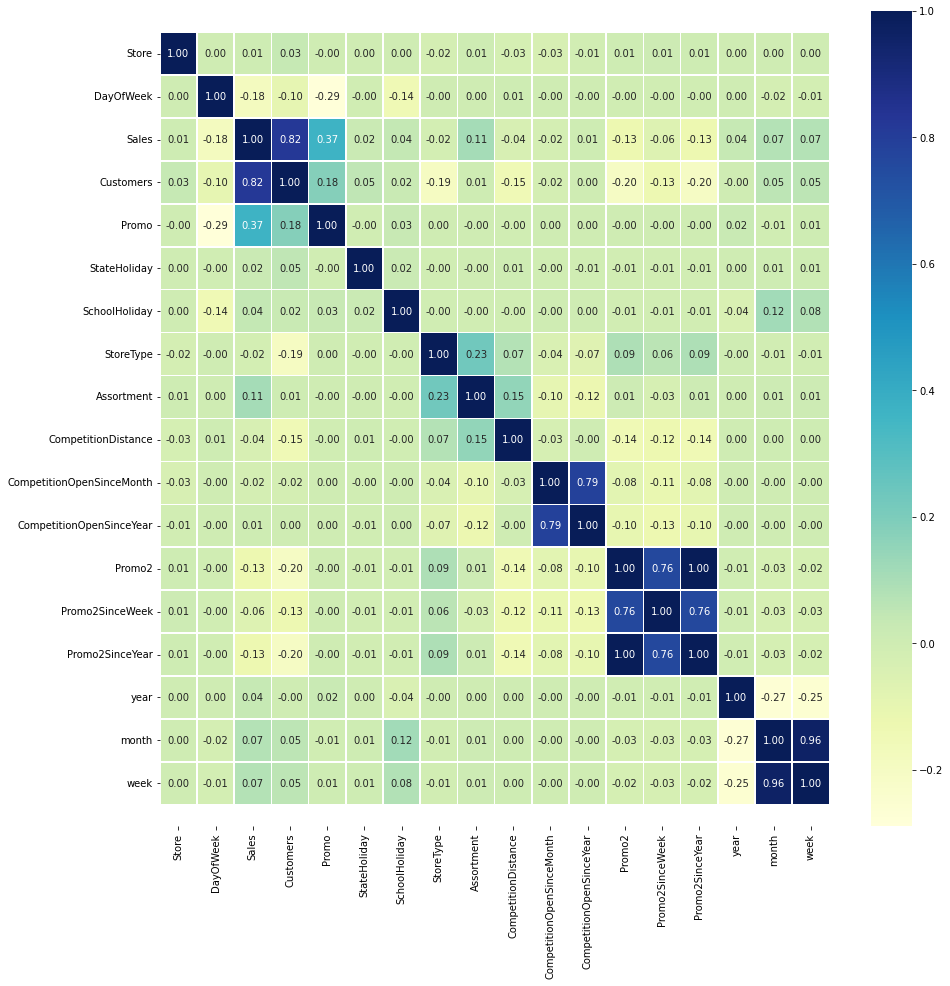

In [66]:
corr_matrix = ROSS2.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

High multicollinearity between promo2,promo2sinceweek and promo2sinceyear.
So we need to remove  2 among  the 3. We can drop promo2sinceweek and promo2sinceyear. Same with competionopensincemonth and competitionopensinceyear,we competionsinceyear. We can also ignore the date variables (year,month and week). We need to remove store ID too.

In [67]:
#Selected variables are compiled in a new dataset ROSS3
ROSS3= ROSS2[['DayOfWeek','Sales','Customers','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionDistance','Promo2']]

In [68]:
ROSS3.head()

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,5,5263,555,1,0,1,2,1,1270.0,0
1,5,6064,625,1,0,1,0,1,570.0,1
2,5,8314,821,1,0,1,0,1,14130.0,1
3,5,13995,1498,1,0,1,2,3,620.0,0
4,5,4822,559,1,0,1,0,1,29910.0,0


In [69]:
ROSS3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            844392 non-null  int64  
 1   Sales                844392 non-null  int64  
 2   Customers            844392 non-null  int64  
 3   Promo                844392 non-null  int64  
 4   StateHoliday         844392 non-null  int64  
 5   SchoolHoliday        844392 non-null  int64  
 6   StoreType            844392 non-null  int64  
 7   Assortment           844392 non-null  int64  
 8   CompetitionDistance  844392 non-null  float64
 9   Promo2               844392 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 103.1 MB


## Variable selection modification or preparation for prediction model

Categorical Variables

In [70]:
#DayOfWeek
#We can see 'DayOfWeek' has 7 ctergories and can be simplified. As we saw earlier more sales happen in weekends, so we can create 2 categories.
ROSS3['DayOfWeek'].replace([1,2,3,4,5,6,7],
                        [1,0,0,0,0,0,1], inplace=True)

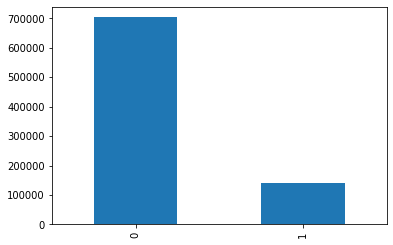

In [71]:
#weekday=0 weekend=1
ROSS3['DayOfWeek'].value_counts().plot(kind='bar')

In [72]:
#Promo,Schoolholiday and promo2 dont need changes as they are dichotomous
#We need use dummies for 'Assortment','StateHoliday' and 'StoreType'
ROSS3= pd.get_dummies(ROSS3,columns=['StateHoliday','StoreType','Assortment'])

In [73]:
ROSS3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            844392 non-null  int64  
 1   Sales                844392 non-null  int64  
 2   Customers            844392 non-null  int64  
 3   Promo                844392 non-null  int64  
 4   SchoolHoliday        844392 non-null  int64  
 5   CompetitionDistance  844392 non-null  float64
 6   Promo2               844392 non-null  int64  
 7   StateHoliday_0       844392 non-null  uint8  
 8   StateHoliday_1       844392 non-null  uint8  
 9   StateHoliday_2       844392 non-null  uint8  
 10  StateHoliday_3       844392 non-null  uint8  
 11  StoreType_0          844392 non-null  uint8  
 12  StoreType_1          844392 non-null  uint8  
 13  StoreType_2          844392 non-null  uint8  
 14  StoreType_3          844392 non-null  uint8  
 15  Assortment_1    

In [74]:
#We need to drop StateHoliday-0, since it represents none.
ROSS3.drop(['StateHoliday_0'],axis = 1, inplace=True)

Continous Variables

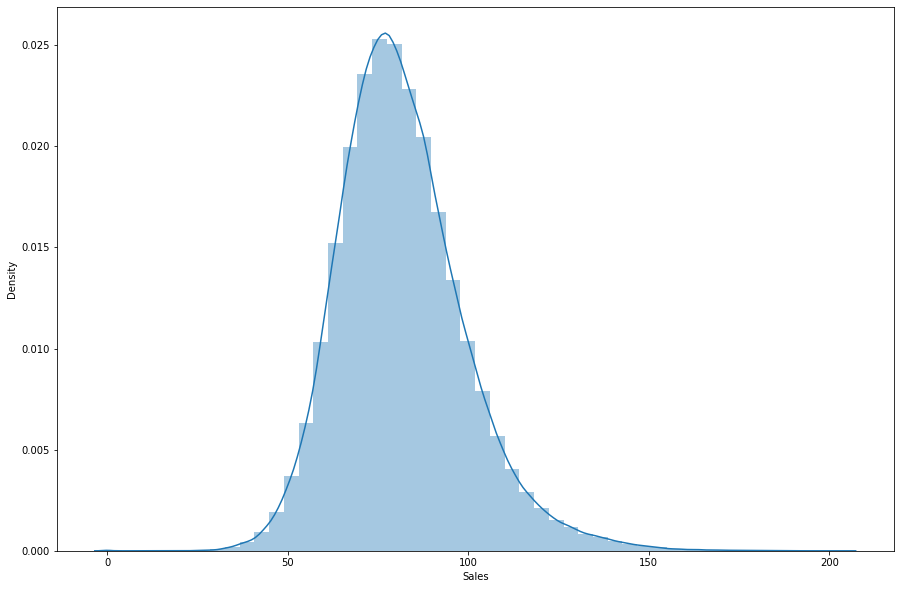

In [75]:
#Sales
#Applying transformation to reduce skewness 
ROSS3['Sales']=np.sqrt(ROSS3['Sales'])
plt.figure(figsize=(15,10))
sns.distplot(ROSS3['Sales'])

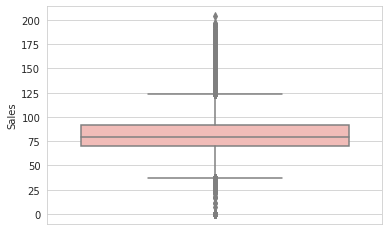

In [76]:
#checking for outliers
sns.set_style('whitegrid')
sns.boxplot(y=ROSS3['Sales'], palette='Pastel1');
plt.show()

In [77]:
#Removing outliers
percentile_25 = np.percentile(ROSS3['Sales'],25)
percentile_75 = np.percentile(ROSS3['Sales'],75)
iqr = (percentile_75 - percentile_25)
upper_outlier_bound = percentile_75 + 1.5*iqr
lower_outlier_bound = percentile_25 - 1.5*iqr
ROSS3.drop(index=ROSS3[ROSS3['Sales']>upper_outlier_bound].index,axis=0,inplace=True)
ROSS3.drop(index=ROSS3[ROSS3['Sales']<lower_outlier_bound].index,axis=0,inplace=True)

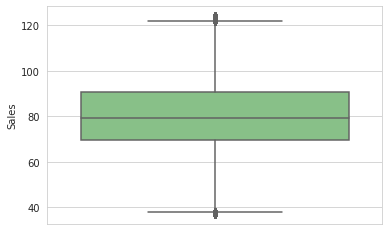

In [78]:
sns.boxplot(y=ROSS3['Sales'], palette='Accent');
plt.show()

Postively skewed customers data.

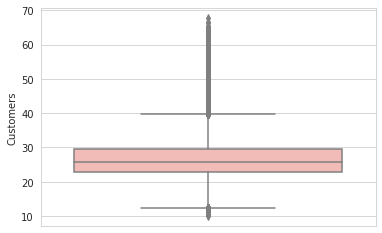

In [79]:
#Customers
#Applying transformation to reduce skewness 
ROSS3['Customers']=np.sqrt(ROSS3['Customers'])
#checking outliers
sns.set_style('whitegrid')
sns.boxplot(y=ROSS3['Customers'], palette='Pastel1');
plt.show()

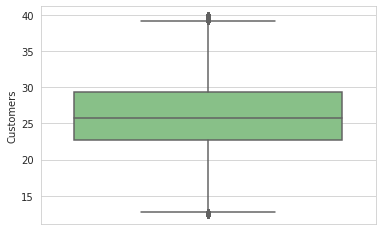

In [80]:
percentile_25 = np.percentile(ROSS3['Customers'],25)
percentile_75 = np.percentile(ROSS3['Customers'],75)
iqr = (percentile_75 - percentile_25)
upper_outlier_bound = percentile_75 + 1.5*iqr
lower_outlier_bound = percentile_25 - 1.5*iqr
ROSS3.drop(index=ROSS3[ROSS3['Customers']>upper_outlier_bound].index,axis=0,inplace=True)
ROSS3.drop(index=ROSS3[ROSS3['Customers']<lower_outlier_bound].index,axis=0,inplace=True)
sns.set_style('whitegrid')
sns.boxplot(y=ROSS3['Customers'], palette='Accent');
plt.show()


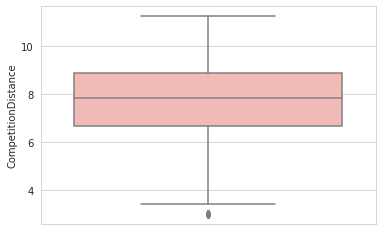

In [81]:
#CompetitionDistance
#Applying transformation to reduce skewness 
ROSS3['CompetitionDistance']=np.log(ROSS3['CompetitionDistance'])
#checking outliers
sns.set_style('whitegrid')
sns.boxplot(y=ROSS3['CompetitionDistance'], palette='Pastel1');
plt.show()

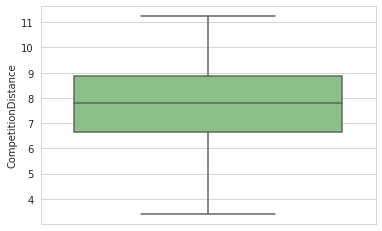

In [82]:
percentile_25 = np.percentile(ROSS3['CompetitionDistance'],25)
percentile_75 = np.percentile(ROSS3['CompetitionDistance'],75)
iqr = (percentile_75 - percentile_25)
upper_outlier_bound = percentile_75 + 1.5*iqr
lower_outlier_bound = percentile_25 - 1.5*iqr
ROSS3.drop(index=ROSS3[ROSS3['CompetitionDistance']>upper_outlier_bound].index,axis=0,inplace=True)
ROSS3.drop(index=ROSS3[ROSS3['CompetitionDistance']<lower_outlier_bound].index,axis=0,inplace=True)
sns.set_style('whitegrid')
sns.boxplot(y=ROSS3['CompetitionDistance'], palette='Accent');
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84f99b4a10>,
      dtype=object)

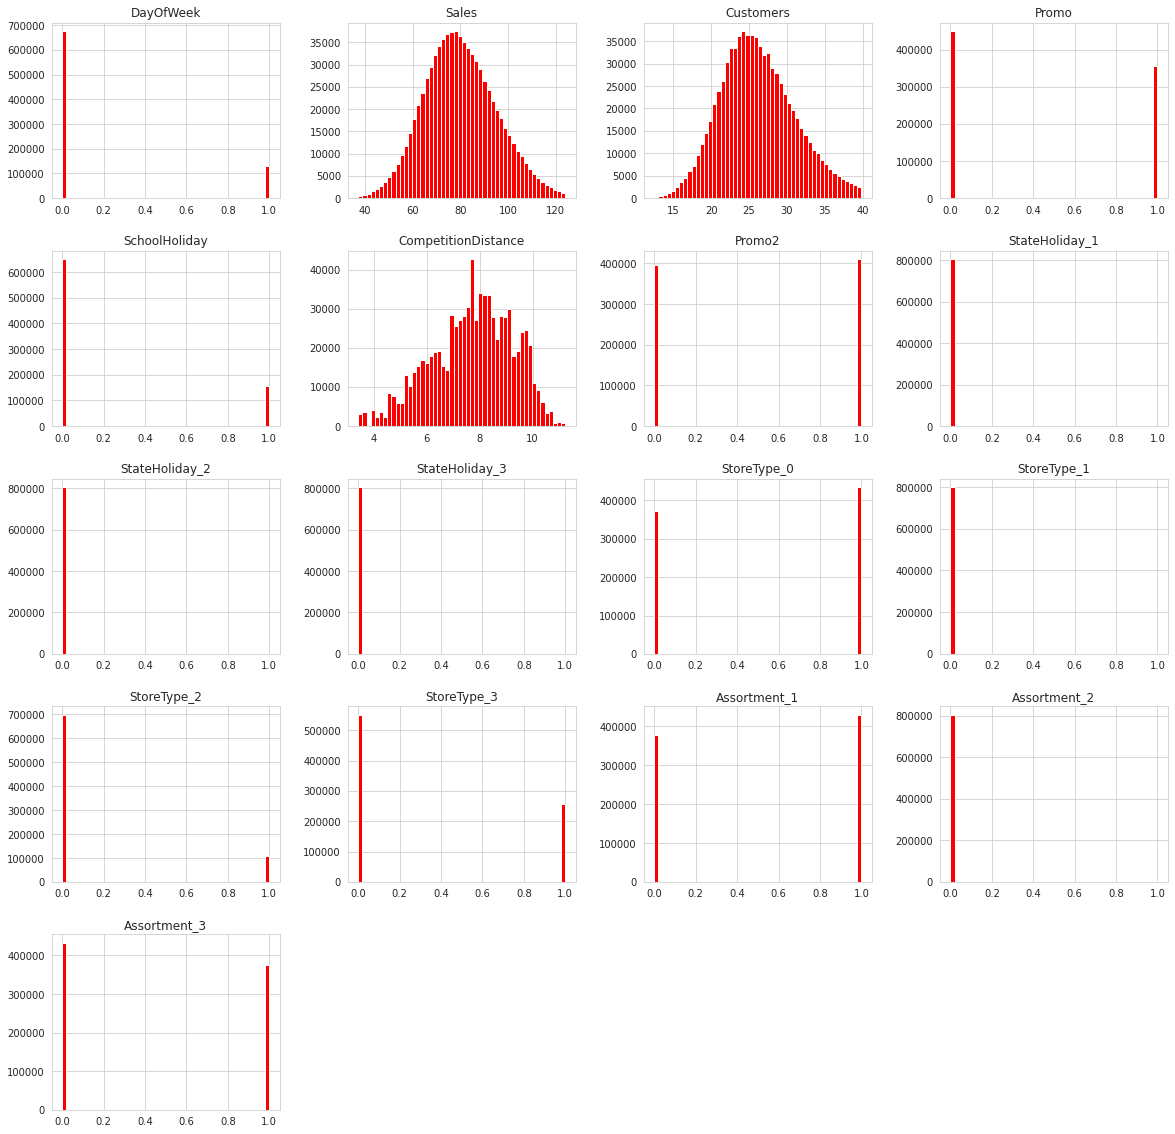

In [83]:
ROSS3.hist(figsize = (20,20),bins=50,color='red')

In [84]:
ROSS3.head()

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,StateHoliday_1,StateHoliday_2,StateHoliday_3,StoreType_0,StoreType_1,StoreType_2,StoreType_3,Assortment_1,Assortment_2,Assortment_3
0,0,72.546537,23.558438,1,1,7.146772,0,0,0,0,0,0,1,0,1,0,0
1,0,77.871689,25.000000,1,1,6.345636,1,0,0,0,1,0,0,0,1,0,0
2,0,91.181138,28.653098,1,1,9.556055,1,0,0,0,1,0,0,0,1,0,0
3,0,118.300465,38.704005,1,1,6.429719,0,0,0,0,0,0,1,0,0,0,1
4,0,69.440622,23.643181,1,1,10.305948,0,0,0,0,1,0,0,0,1,0,0


## Regression Model

In [85]:
from sklearn import metrics
#Evaluate Metrics
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    

In [86]:
#preprocessing data
X = ROSS3.drop(columns=['Sales']).copy()
y = ROSS3[['Sales']].copy()

In [87]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [88]:
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)

LinearRegression(normalize=True)

In [89]:
pred = LR.predict(X_test)
test_pred = LR.predict(X_test)
train_pred = LR.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)


Test set evaluation:

MAE: 4.879969897252813
MSE: 38.101256125301404
RMSE: 6.172621495386008
R2 Square 0.8310127971223452
__________________________________
Train set evaluation:

MAE: 4.893372282164424
MSE: 38.291542581448184
RMSE: 6.188016045668287
R2 Square 0.8307157914313972
__________________________________


In [90]:
#Mean of Residuals 
residuals = y_train.values-train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.8599316443868745e-14


Mean of residuals is very close to 0 which shows good model fit.

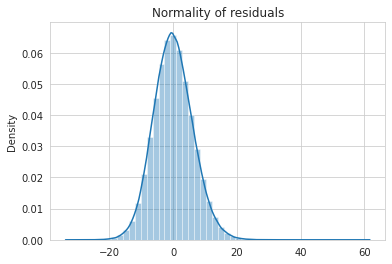

In [91]:
#Checking Normality of residuals
Rplot = sns.distplot(residuals,kde=True)
Rplot = plt.title('Normality of residuals')

Normal distribution is seen, but large sample size can show normality and can be biased.

## **CROSS VALIDATION**

Cross Validation can help in determining appropriate accuracy.

In [92]:
# Crossvalidation
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
#Lets take K=7 to predict data 7 times
k = 7



cv_result = cross_val_score(LR,X,y,cv=k) # uses R^2 as score 
print('CVscores: ',cv_result)
print('CVscoresAverage: ',np.sum(cv_result)/k)

CVscores:  [0.8104891  0.82795618 0.83496846 0.83448024 0.82968377 0.82562715
 0.83209782]
CVscoresAverage:  0.8279003894365528


Linear Regression gives high coefficient to features it considers important.Adding to this overfitting may arise to large sample size. We can use regularisation techniques to prevent this by penalizing large coefficients.


**Ridge regression or L2 regression**: First regularization technique.

Ridge regression lost fuction = OLS + alpha * sum(parameter^2) alpha is parameter we need to choose to fit and predict. alpha is hyperparameter that we need to choose for best accuracy and model complexity. This process is called hyperparameter tuning.
What if alpha is zero? lost function = OLS so that is linear rigression
If alpha is small that can cause overfitting
If alpha is big that can cause underfitting.


**Lasso regression**: Second regularization technique.

Lasso regression lost fuction = OLS + alpha * sum(absolute_value(parameter))
It can be used to select important features od the data. Because features whose values are not shrinked to zero, is chosen by lasso regression

In [93]:
#Lasso Regression
lasso = Lasso(selection='random',random_state=0)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

test_pred = lasso_regressor.predict(X_test)
train_pred = lasso_regressor.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n')
zw=print_evaluate(y_train, train_pred)

print("The best fit alpha value is :" ,lasso_regressor.best_params_)

Test set evaluation:

MAE: 4.8799698984579685
MSE: 38.10125611814153
RMSE: 6.172621494806038
R2 Square 0.8310127971541008
__________________________________
Train set evaluation:

MAE: 4.893372283916927
MSE: 38.29154258145156
RMSE: 6.18801604566856
R2 Square 0.8307157914313822
__________________________________
The best fit alpha value is : {'alpha': 1e-08}


In [94]:
#Ridge Regression
ridge = Ridge(alpha=0.001, solver='cholesky', tol=0.0001, random_state=42)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 4.879969902932538
MSE: 38.1012561337092
RMSE: 6.172621496067064
R2 Square 0.8310127970850548
__________________________________
Train set evaluation:

MAE: 4.893372286467661
MSE: 38.291542581452156
RMSE: 6.188016045668608
R2 Square 0.8307157914313796
__________________________________


In [95]:
#Elastic Net
Elastic = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
Elastic.fit(X_train, y_train)

test_pred = Elastic.predict(X_test)
train_pred = Elastic.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 4.986305484960194
MSE: 41.17548387245897
RMSE: 6.416812594462999
R2 Square 0.8173779409303981
__________________________________
Train set evaluation:

MAE: 5.00114576844674
MSE: 41.430084620880244
RMSE: 6.436620590098522
R2 Square 0.8168405184759023
__________________________________


In [96]:
#Decision tree regressor
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [97]:
test_pred = DT_model.predict(X_test)
train_pred = DT_model.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 2.915466075405171
MSE: 15.968637457532006
RMSE: 3.996077759194884
R2 Square 0.9291756846850063
__________________________________
Train set evaluation:

MAE: 0.5575810328571399
MSE: 1.5090816323811005
RMSE: 1.2284468374256579
R2 Square 0.993328456557746
__________________________________


In [ ]:
#Support vector Regressor
SVR = SVR(kernel='rbf')
SVR.fit(X_train,y_train)

In [99]:
test_predSVR = SVR.predict(X_test)
train_predSVR = SVR.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_predSVR)
print('====================================')
print('Train set evaluation:\n')
print_evaluate(y_train, train_predSVR)

TypeError: ignored

In [100]:
#Random forest regressor
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [50]}
rfr = RandomForestRegressor(random_state = 1)

random_forest_model= GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

# # Fit the object to train dataset
random_forest_model.fit(X_train, y_train)
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [50]}
rfr = RandomForestRegressor(random_state = 1)

random_forest_model= GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

# # Fit the object to train dataset
random_forest_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50]},
             return_train_score=True)

In [101]:
test_pred = random_forest_model.predict(X_test)
train_pred = random_forest_model.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 2.467204658219938
MSE: 11.065634606460709
RMSE: 3.326504863435601
R2 Square 0.9509215487788021
__________________________________
Train set evaluation:

MAE: 1.1575385967549043
MSE: 2.6175868662050674
RMSE: 1.6178958143851747
R2 Square 0.9884278331158228
__________________________________


In [102]:
ETR = ExtraTreesRegressor()
ETR.fit(X_train,y_train)

ExtraTreesRegressor()

In [104]:
test_predETR = ETR.predict(X_test)
train_predETR = ETR.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_predETR)
print('====================================')
print('Train set evaluation:\n')
print_evaluate(y_train, train_predETR)

Test set evaluation:

MAE: 2.7488725869214385
MSE: 13.704902354030713
RMSE: 3.702013283880909
R2 Square 0.9392158330186623
__________________________________
Train set evaluation:

MAE: 0.5575810328572001
MSE: 1.5090816323811005
RMSE: 1.2284468374256579
R2 Square 0.993328456557746
__________________________________


In [105]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train,y_train)

GradientBoostingRegressor()

In [106]:
test_predGBR = GBR.predict(X_test)
train_predGBR = GBR.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_predGBR)
print('====================================')
print('Train set evaluation:\n')
print_evaluate(y_train, train_predGBR)

Test set evaluation:

MAE: 4.5346751253325905
MSE: 33.23093044999484
RMSE: 5.76462752049036
R2 Square 0.8526137309673254
__________________________________
Train set evaluation:

MAE: 4.542914199100573
MSE: 33.33627044296414
RMSE: 5.773757047448753
R2 Square 0.8526226999979831
__________________________________


In [107]:
XGBR = xgb.XGBRegressor()
XGBR.fit(X_train,y_train)

[15:05:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [109]:
test_predXGBR = XGBR.predict(X_test)
train_predXGBR = XGBR.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_predXGBR)
print('====================================')
print('Train set evaluation:\n')
print_evaluate(y_train, train_predXGBR)

Test set evaluation:

MAE: 4.533900093647091
MSE: 33.22716613724453
RMSE: 5.764301010291233
R2 Square 0.8526304264977913
__________________________________
Train set evaluation:

MAE: 4.542445414241084
MSE: 33.33397402707027
RMSE: 5.773558177334864
R2 Square 0.8526328522906549
__________________________________


In [110]:
CBR = CatBoostRegressor()
CBR.fit(X_train,y_train)

Learning rate set to 0.111429
0:	learn: 13.8362964	total: 244ms	remaining: 4m 3s
1:	learn: 12.7818667	total: 403ms	remaining: 3m 21s
2:	learn: 11.8814610	total: 541ms	remaining: 2m 59s
3:	learn: 11.0889429	total: 715ms	remaining: 2m 58s
4:	learn: 10.4036865	total: 866ms	remaining: 2m 52s
5:	learn: 9.8045782	total: 986ms	remaining: 2m 43s
6:	learn: 9.3035336	total: 1.08s	remaining: 2m 34s
7:	learn: 8.8647667	total: 1.15s	remaining: 2m 22s
8:	learn: 8.4838818	total: 1.22s	remaining: 2m 14s
9:	learn: 8.1444476	total: 1.29s	remaining: 2m 7s
10:	learn: 7.8653678	total: 1.36s	remaining: 2m 2s
11:	learn: 7.6208325	total: 1.43s	remaining: 1m 57s
12:	learn: 7.4070786	total: 1.5s	remaining: 1m 53s
13:	learn: 7.2218945	total: 1.58s	remaining: 1m 51s
14:	learn: 7.0616878	total: 1.65s	remaining: 1m 48s
15:	learn: 6.9215527	total: 1.72s	remaining: 1m 46s
16:	learn: 6.7976486	total: 1.8s	remaining: 1m 44s
17:	learn: 6.6903741	total: 1.87s	remaining: 1m 41s
18:	learn: 6.5975523	total: 1.94s	remaining:

In [111]:
test_predCBR = CBR.predict(X_test)
train_predCBR = CBR.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_predCBR)
print('====================================')
print('Train set evaluation:\n')
print_evaluate(y_train, train_predCBR)

Test set evaluation:

MAE: 2.9300665114411664
MSE: 14.547888915184666
RMSE: 3.814169492194161
R2 Square 0.9354770077010828
__________________________________
Train set evaluation:

MAE: 2.928095254053523
MSE: 14.558032704474519
RMSE: 3.815499011200831
R2 Square 0.9356399643746188
__________________________________


In [112]:
ABR = AdaBoostRegressor()
ABR.fit(X_train,y_train)

AdaBoostRegressor()

In [113]:
test_predABR = ABR.predict(X_test)
train_predABR = ABR.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_predABR)
print('====================================')
print('Train set evaluation:\n')
print_evaluate(y_train, train_predABR)

Test set evaluation:

MAE: 6.4901132561287325
MSE: 63.866979382791406
RMSE: 7.991681886986706
R2 Square 0.7167363152897261
__________________________________
Train set evaluation:

MAE: 6.505127727086061
MSE: 64.18414258900569
RMSE: 8.011500645260268
R2 Square 0.7162464333286398
__________________________________


In [ ]:
KNR = neighbors.KNeighborsRegressor()
KNR.fit(X_train,y_train)

In [ ]:
test_predKNN = KNR.predict(X_test)
train_predKNN = KNR.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_predKNR)
print('====================================')
print('Train set evaluation:\n')
print_evaluate(y_train, train_predKNR)

In [ ]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['ElasticNet: ', ElasticNet(random_state=0)],
           ['DecisionTreeRegresson: ', DecisionTreeRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()],
           ['CatBoost:', CatBoostRegressor()],
           ['AdaBoostRegressor: ',AdaBoostRegressor()]]

In [ ]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

In [ ]:
['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],

Model 1

In [ ]:
# define dependent variable
DV = 'Sales'

# defining independent variable
IV = list(ROSS3.columns.drop(['Promo2SinceYear','Date','Sales']))

In [ ]:
IV


In [ ]:
# Creation of independent variables
x = ROSS3[IV].values

# Creation of dependent variable
y = ROSS3[DV].values

In [ ]:
# splitting train & test dataset
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 0)
print(xtrain.shape)
print(xtest.shape)

**Linear Regression**

In [ ]:
LR = LinearRegression().fit(xtrain, ytrain)

In [ ]:
LR.score(xtrain, ytrain)

In [ ]:
LR.score(xtest, ytest)

In [ ]:
# Predicting the Test set results
LRtestpred = LR.predict(xtest)

In [ ]:
# Predicting Train
LRtrainpred = LR.predict(xtrain)

In [ ]:
MSE=mse(ytest,LRtestpred)
MSE

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

In [ ]:
LR.coef_

In [ ]:
LR = LinearRegression()
LR.fit(xtrain,ytrain)

In [ ]:
from scipy import stats
LRres=LR.fit(x,y)
sns.distplot(LRres.resid, fit=stats.norm);

LASSO

In [ ]:
L1 = Lasso(alpha = 0.2, max_iter=10000)

In [ ]:
L1.fit(xtrain, ytrain)

In [ ]:
yPredLasso = L1.predict(xtest)

In [ ]:
L1.score(xtest, ytest)

In [ ]:
pd.DataFrame(zip(ytest, yPredLasso), columns = ['actual', 'pred'])

RIDGE

In [ ]:
L2 = Ridge(alpha = 0.5)

In [ ]:
L2.fit(xtrain, ytrain)

In [ ]:
L2.predict(xtest)

In [ ]:
L2.score(xtest, ytest)

DECISION TREE

In [ ]:
sales_mean=ROSS3['Sales'].mean()

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(xtrain, ytrain)
y_pred_dt = decision_tree.predict(xtest)
y_train_dt = decision_tree.predict(xtrain)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mse(ytest, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(ytest, y_pred_dt)
print("R2 :" ,r2)